<a href="https://colab.research.google.com/github/RohitBiswas-1998/Projects/blob/master/Monte_Carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo Simulation to predict stock prices -**

I always wanted to perform stock price prediction, so today's exercise would be to use Monte Carlo Simulation to simulate the geometric brownian motion equation where, the stock prices believed to be following a log normal distrbution, even though it's not the most potent way to go about stock price predictions but it would be simple and fun to workout the simulation and get some cool graphs!

## **About Dataset**


Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. The amount of financial data on the web is seemingly endless. A large and well structured dataset on a wide array of companies can be hard to come by. Here, I will use a dataset with historical stock pricesfor all companies currently found on the S&P 500 index.

*The data has the following columns:*

Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

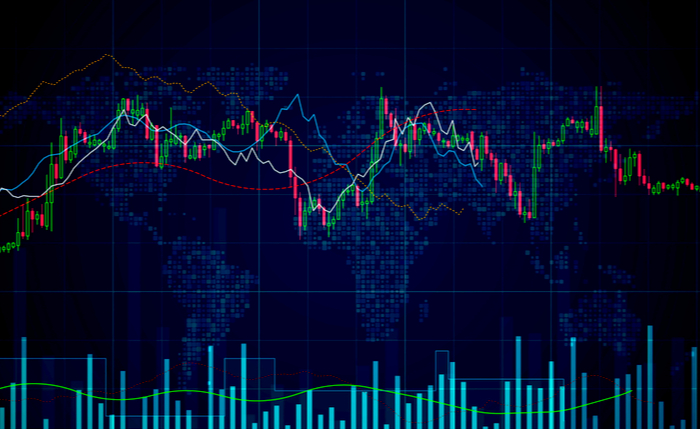

Importing Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

Let's load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
# the missing values for each variables
# we are only interested with the closing price of the stock and that has no missings

df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [6]:
# Checking out the different companies

df.groupby('Name').count()

,date,open,high,low,close,volume
Name,,,,,,
A,1259,1259,1259,1259,1259,1259
AAL,1259,1259,1259,1259,1259,1259
AAP,1259,1259,1259,1259,1259,1259
AAPL,1259,1259,1259,1259,1259,1259
ABBV,1259,1259,1259,1259,1259,1259
...,...,...,...,...,...,...
XYL,1259,1259,1259,1259,1259,1259
YUM,1259,1259,1259,1259,1259,1259
ZBH,1259,1259,1259,1259,1259,1259


In [7]:
# We will randomly pick one company

# pick_a_company = random.choice(df.Name)

# print("Company:", pick_a_company )

In [8]:
# Post Random selection, I shall proceed with CDNS

dt = df[df.Name == 'CDNS']

In [9]:
fig = px.bar(dt, x='date', y='volume')
fig.update_layout(title=f'CDNS stock volume', barmode='stack', font_color="black")
fig.show()

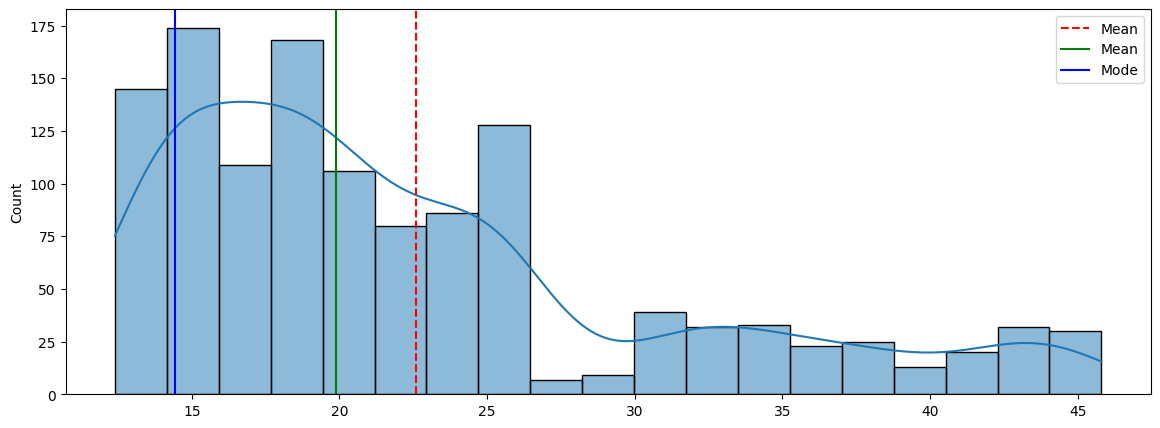

In [10]:
# The stock prices follow a log normal distribution

f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
v_dist_1 = dt["close"].values
sns.histplot(v_dist_1, ax=ax1, kde=True)
mean=dt["close"].mean()
median=dt["close"].median()
mode=dt["close"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

Monte Carlo simulation

In [11]:
# In a GBM, the log returns follow a normal distribution, and the daily return is expressed as a function of the drift and volatility.
# and used log(1 + pct_change of close price) due to non existence of log function for certain values

log_returns = np.log(1 + dt.close.pct_change())

u = log_returns.mean() # Mean of the logarithmic return/μ is the expected return or drift rate of the asset
var = log_returns.var() # Variance of the logarithic return/σ is the volatility or standard deviation of the asset's returns.
drift = u - (0.5 * var) # drift / trend of the logarithmic return
stdev = log_returns.std() # Standard deviation of the log return


t_intervals = 250 # forecast 250 time points
iterations = 200 # 200 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

# S(t) = S(t-1) * R(t); S(t) and S(t-1) are stock prices at t and t-1, R(t) is daily return at time t
# Rt = exp((μ - 0.5 * σ^2) * Δt + σ * √(Δt) * Z; Δt=1 (the interval jump is one unit), Z is a standard normal random variable_Z ~ brownian motion

In [12]:
dt['log_returns'] = np.log(1 + dt.close.pct_change())

<ipython-input-12-05108adc80df>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
dt.head()

,date,open,high,low,close,volume,Name,log_returns
107156,2013-02-08,13.9600,14.16,13.90,14.16,1716539,CDNS,NaN
107157,2013-02-11,14.1799,14.27,14.09,14.22,3221848,CDNS,0.004228
107158,2013-02-12,14.1800,14.50,14.16,14.36,3306773,CDNS,0.009797
107159,2013-02-13,14.3500,14.40,14.14,14.25,2253042,CDNS,-0.007690
107160,2013-02-14,14.2100,14.33,14.17,14.20,1382265,CDNS,-0.003515


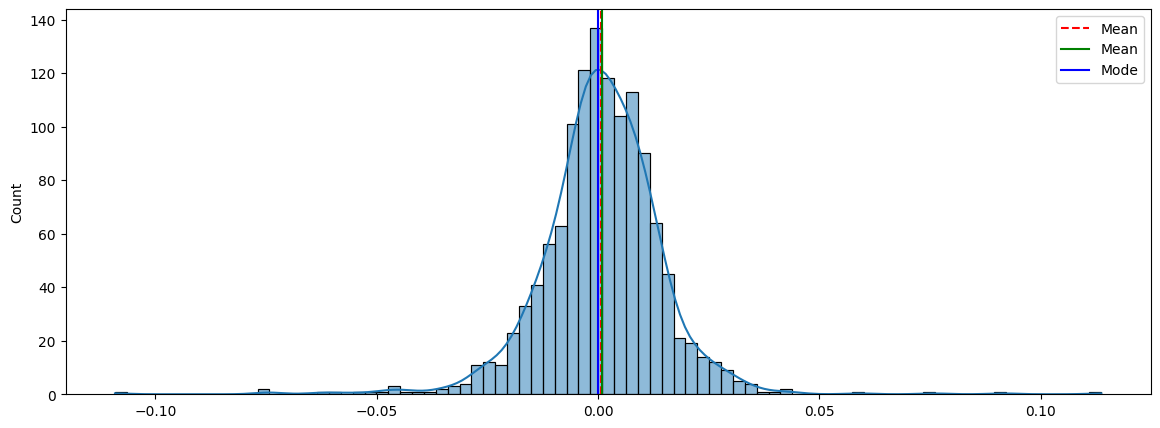

In [14]:
# log returns follow a normal distribution thus dS(t) can be expressed using a geometric brownian motion

f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
v_dist_1 = dt["log_returns"].values
sns.histplot(v_dist_1, ax=ax1, kde=True)
mean=dt["log_returns"].mean()
median=dt["log_returns"].median()
mode=dt["log_returns"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

In [15]:
# S(0) is the initial level of price

S0 = dt.close.iloc[-1]
S0

38.57

In [16]:
#Let us first create en empty matrix such as daily returns

price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[38.57, 38.57, 38.57, ..., 38.57, 38.57, 38.57],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [17]:
# With a simple for loop, we are going to forecast the next 250 days

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

# S(t) = S(t-1) * R(t); S(t) and S(t-1) are stock prices at t and t-1, R(t) is daily return at time t
# S(t=1) = S(0) * e^((μ - 0.5 * σ^2) + σZ))

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,close
0,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,...,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000,38.570000
1,38.608312,38.362958,39.034186,38.391836,38.775220,39.804009,38.009314,37.959991,38.665663,37.962271,...,38.670994,38.498975,39.188766,38.373100,38.942374,39.218615,39.316965,37.789382,38.735822,38.608312
2,39.085881,38.566269,38.976592,38.273043,39.540404,39.855744,38.458144,38.706003,38.213181,37.068843,...,37.870858,38.475973,39.585860,39.099010,40.818009,40.221115,39.555960,38.262961,39.378558,39.085881
3,39.840498,39.283128,39.363378,38.176930,40.007600,39.145968,38.665931,38.679792,38.207277,36.409740,...,38.166672,39.548633,39.257555,39.076757,42.103248,40.720990,40.024158,38.234704,39.792829,39.840498
4,39.955528,39.386484,40.559801,38.359139,38.605910,39.788795,37.702120,39.221534,38.491173,36.388646,...,37.844641,39.107871,37.722756,39.299139,42.177235,40.735445,40.593826,38.592182,40.206031,39.955528


In [18]:
close = dt.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

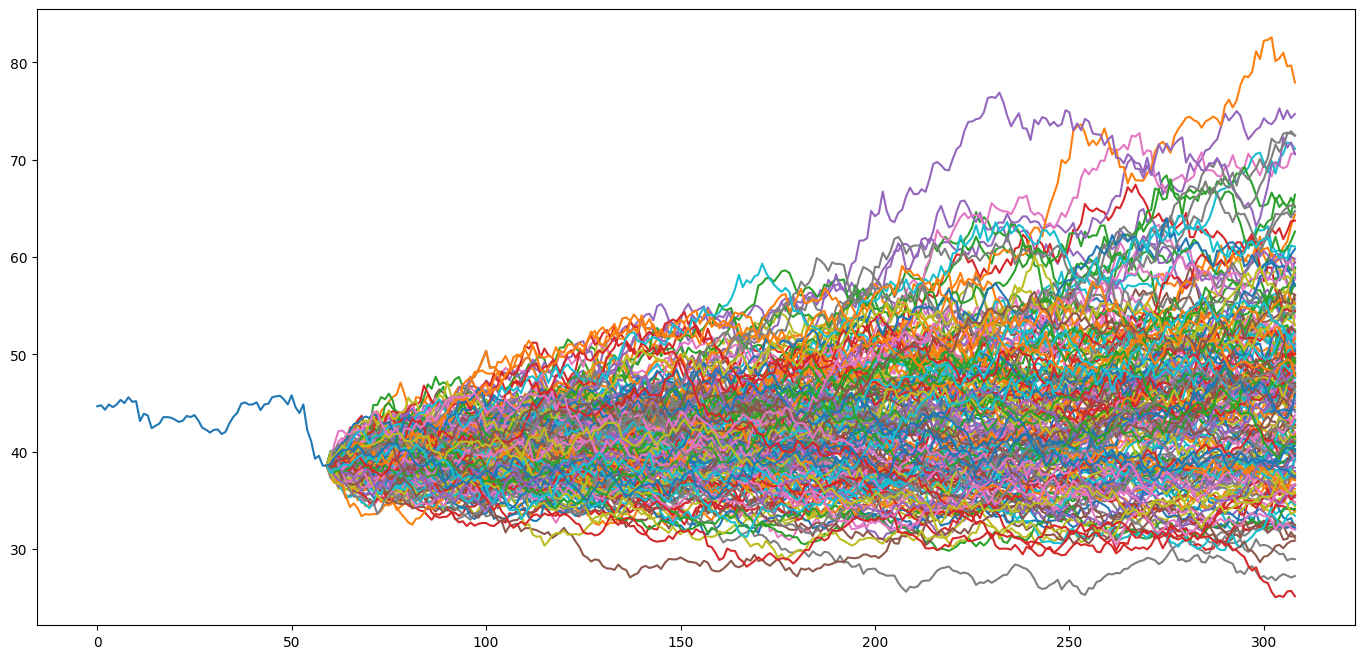

In [19]:
# We used Monte Carlo simulation to estimate the future price trajectories for stock prices of CDNS.
# 200 iterations

monte_carlo = monte_carlo_forecast.iloc[1200:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()

# What a cool graph!